<a href="https://colab.research.google.com/github/Morrisbang/bangbangbang/blob/main/openCV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving tofu.jpg to tofu.jpg


-----0.0002491474151611328 seconds ----


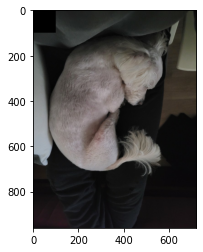

(960, 720, 3)
2073600
[41 42 40]
40


In [ ]:
import cv2
import matplotlib.pyplot as plt
import time

image = cv2.imread('tofu.jpg')

'''
#이렇게도 가능한데, 하나의 픽셀씩 바꿔줘야하기 때문에 느리다.
start_time = time.time()
for i in range(0, 100):
  for j in range(0, 100):
    image[i, j] = [255, 255, 255]
print("-----%s seconds ----" %(time.time() - start_time))
'''
#아래와 같이 슬라이스를 이용하는 방식이 빠르다.
start_time = time.time()
image[0:100, 0:100] = [0, 0, 0]
print("-----%s seconds ----" %(time.time() - start_time))

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

#픽셀 수 및 이미지 크기 확인
print(image.shape)
print(image.size)

#이미지 Numpy 객체의 특정 픽셀을 가르킵니다.
px = image[100, 100]

#B, G, R 순서로 출력됩니다.
#(단, Gray scale 에서는 b, g, r 값이 구분되지 않습니다.)
print(px)

#R값만 출력하기
print(px[2])


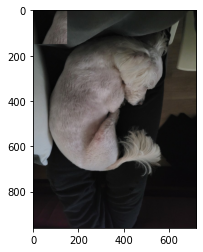

In [ ]:
# ROI REGION OF INTEREST
# 유의미한 부분만 추출

import cv2
import matplotlib.pyplot as plt

image = cv2.imread('tofu.jpg')
#numpy slicing: roi 처리 가능
roi = image[200:350, 50:200]

#roi 단위로 이미지 복사하기
image[0:150, 0:150] = roi

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

#주의사항 복붙 크기가 같아야함.



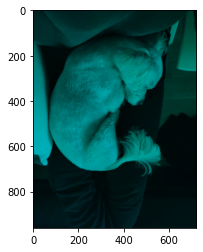

In [ ]:
import cv2
import matplotlib.pyplot as plt

image = cv2.imread('tofu.jpg')
# [:, :]는 모든 픽셀을 뜻하고, [:, :, 2]는 빨간색을 나타냄
image[:, :, 2] = 0 

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

plt.show()

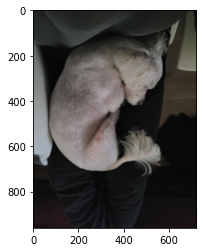

(960, 720, 3)
2073600


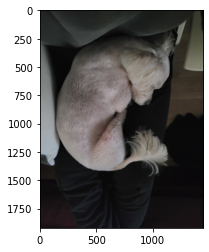

(1920, 1440, 3)
8294400


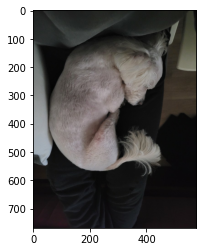

(768, 576, 3)
1327104


In [ ]:
'''
이미지 변형
크기 조절, 회전

만일 크기 조절은 한다면 이미지가 확대가 되서 픽셀이 빈 부분이 생기는데, 
이것을 어떻게 채우나? 

다양한 방법이 존재.
보간법(interpolation)

linear, cubic ... 등

#cv2.resize(image, dsize, fx, fy, interpolation) 이미지 크기를 조절

dsize: manual size
fx: 가로 비율
fy: 세로 비율
interpolation: 어떤 방식으로 채울건지(픽셀 사이의 값을 조절하는 방법)
ㄴINTER_CUBIC, INTER_AREA가 많이 쓰인다.

'''

import cv2
import matplotlib.pyplot as plt



image = cv2.imread('tofu.jpg')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()
print(image.shape)
print(image.size)

expand= cv2.resize(image, None, fx=2.0, fy=2.0, interpolation = cv2.INTER_CUBIC)
plt.imshow(cv2.cvtColor(expand, cv2.COLOR_BGR2RGB))
plt.show()
print(expand.shape)
print(expand.size)

shrink= cv2.resize(image, None, fx=0.8, fy=0.8, interpolation = cv2.INTER_CUBIC)
plt.imshow(cv2.cvtColor(shrink, cv2.COLOR_BGR2RGB))
plt.show()
print(shrink.shape)
print(shrink.size)






<function matplotlib.pyplot.show>

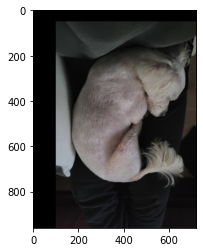

In [ ]:
#이미지 위치 변경
'''
cv2.warpAffine(image, M, dsize)
M : 변환 행렬
dsize : Manual size

변환 행렬을 이용해서 원하는 대로 이미지를 제어할 수 있음

변환 행렬은
m11 m12 m13
m21 m22 m23 으로 표현됨

이미지의 모든 좌표는 (a, b)는 다음의 좌표로 이동됨. 
(m11*a+m12*b+m13, m21*a+m22*b+m23)
만약 [[1 0 a][0 1 b]]로 만든다면 위치만 이동함. 
'''

import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('tofu.jpg')

height, width = image.shape[:2]

M = np.float32([[1, 0, 100], [0, 1, 50]])
dst = cv2.warpAffine(image, M, (width,height))

plt.imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB))
plt.show





[[ 3.061617e-17  5.000000e-01  1.200000e+02]
 [-5.000000e-01  3.061617e-17  6.600000e+02]]


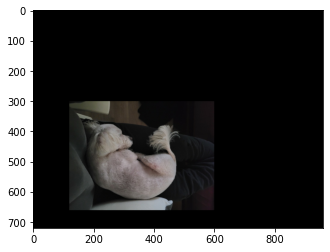

In [ ]:
#이미지 회전
#getRotatationMatrix 이용
# cv2.getRotatationMatrix2D(center, angle, scale)
#center : 회전 중심
#angle : 회전 각도
#scale : scale factor

import cv2
import matplotlib.pyplot as plt
import numpy as np

image = cv2.imread('tofu.jpg')

height, width = image.shape[:2]
M = cv2.getRotationMatrix2D((width / 2, height / 2), 90, 0.5)
print(M)
dst = cv2.warpAffine(image, M, (height, width))

plt.imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB))
plt.show()

In [ ]:
#이미지 겹쳐서 합치기
#적절하게 잘 스며들도록

'''
이미지를 합치는 방법은 2가지가 있음
cv2.add(): Saturation 연산을 수행
0보다 작으면 0, 255보다 크면 255로 표현

np.add(): Modulo 연산을 수행 - 잘 사용안함. 이상해짐
256은 0, 257은 1로 표현
'''

from google.colab import files
uploaded1 = files.upload()

from google.colab import files
uploaded2 = files.upload()

Saving BackGround1408x792.jpg to BackGround1408x792 (1).jpg


Saving Lion.png to Lion (1).png


In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

image1 = cv2.imread('Lion.png')
image2 = cv2.imread('BackGround1408x792.jpg')

print(image1.shape)
print(image2.shape)

shrink = cv2.resize(image2, None, fx=0.3, fy=0.5, interpolation = cv2.INTER_CUBIC)
image2_roi = shrink[0:326, 0:360]
print(shrink.shape)
print(image2_roi.shape)

result = cv2.add(image1, image2_roi)
plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
plt.show()

result = np.add(image1, image2_roi)
plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
plt.show()





AttributeError: ignored

Saving Lion.png to Lion.png


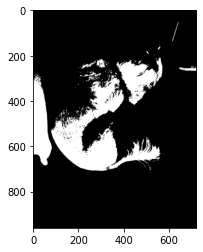

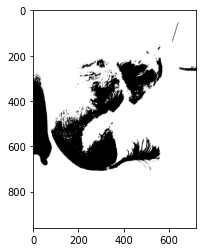

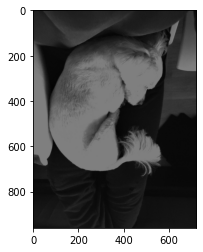

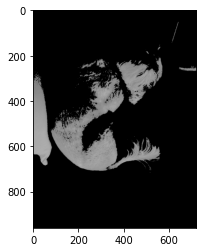

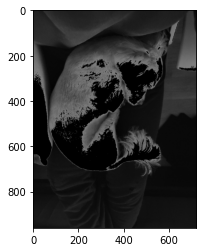

In [ ]:
# 임계점 처리하기
#threshold(image, thresh, max_value, type)
'''
image : 처리할 Gray scale 이미지
thresh : 임계값(전체 픽셀에 적용) 즉, 한계치
max_value : 임계값을 넘었을 때 적용할 값
type: 임계점을 처리하는 방식

THRESH_BINARY: 임계값보다 크면 MAX_VALUE, 작으면 0
THRESH_BINARY_INV: 임계값보다 작으면 max_value, 크면 0 
THRESH_TRUNC: 임계값보다 크면 임계값, 작으면 그대로 
THRESH_TOZERO: 임계값보다 크면 그대로, 작으면 0 
THRESH_TOZERO_INV:임계값보다 크면 0, 작으면 그대로 
'''

import cv2
import matplotlib.pyplot as plt

image = cv2.imread('tofu.jpg', cv2.IMREAD_GRAYSCALE)
images=[]
ret, thres1 = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)
ret, thres2 = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY_INV)
ret, thres3 = cv2.threshold(image, 127, 255, cv2.THRESH_TRUNC)
ret, thres4 = cv2.threshold(image, 127, 255, cv2.THRESH_TOZERO)
ret, thres5 = cv2.threshold(image, 127, 255, cv2.THRESH_TOZERO_INV)

#append 마지막에 추가
images.append(thres1)
images.append(thres2)
images.append(thres3)
images.append(thres4)
images.append(thres5)

for i in images:
  #cvtColor에서 에러가 발생하는 이유는 파일업로드가 제대로 되지 않았기 때문.
  #colab을 한 번 껐다가 다시켜서 작업을 하는 경우에는 파일을 다시 업로드 해야한다.
  #from google.colab import files
  #upload = files.upload()

  plt.imshow(cv2.cvtColor(i, cv2.COLOR_GRAY2RGB))
  plt.show()



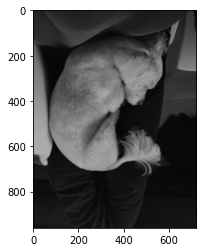

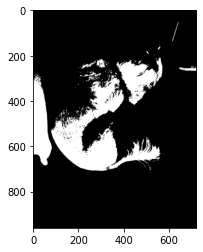

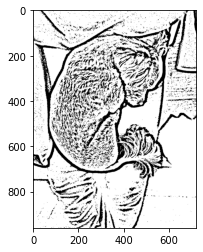

In [ ]:
#적응 임계점 처리
#cv2.adaptiveThreshold(image, max_value, adaptive_method, type, block_size, C)
'''
max_value : 임계값을 넘었을때 적용할 값
adaptive_method : 임계값을 결정하는 계산 방법
-ADAPTIVE_THRESH_MEAN_C: 주변영역의 평균값으로 결정
-ADAPTIVE_THRESH_GAUSSIAN_C : 가우시안 윈도우 기반으로 가중치를 주어 임계값을 결정
type: 임계점을 처리하는 방식
block_size : 임계값을 적용할 영역의크기
C : 평균이나 가중 평균에서 차감할 값
'''

#adaptiveThreshold를 사용하면 전체가 아니라 특정 영역마다 임계점을 처리함

import cv2

image = cv2.imread('tofu.jpg', cv2.IMREAD_GRAYSCALE)

ret, thres1 = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)
thres2 = cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 21, 3 )
#흑백으로 나누면 올바르게 정보를 담아내지 못할 수 있다.
#adaptiveThreshold를 이용하면 보다 깔끔함.
plt.imshow(cv2.cvtColor(image, cv2.COLOR_GRAY2RGB))
plt.show()

plt.imshow(cv2.cvtColor(thres1, cv2.COLOR_GRAY2RGB))
plt.show()

plt.imshow(cv2.cvtColor(thres2, cv2.COLOR_GRAY2RGB))
plt.show()

In [ ]:
# 도형 그리기

